In [54]:
import numpy as np


In [123]:
class Agent:
    genotype = 0
    lenght = 0
    fitness = 0
    def eval(self,tsp_map):
        dist = 0
        for i in range(len(self.genotype)-1):
            dist += tsp_map[self.genotype[i],self.genotype[i-1]]
        self.fitness = dist
    def __init__(self, lenght,tsp_map):
        if type(lenght) == int :
            self.lenght = lenght
            self.genotype = np.random.permutation(lenght)
            self.tsp_map = tsp_map
        else :
            self.genotype = lenght
            self.lenght = len(lenght)
        self.eval(tsp_map)
            
    def resetgeno(self):
        self.genotype = np.random.permutation(lenght)

    def swap(self):
        a = int(np.floor(np.random.rand() * len(self.genotype)))
        b = int(np.floor(np.random.rand() * len(self.genotype)))
        temp = self.genotype[a]
        self.genotype[a] = self.genotype[b]
        self.genotype[b] = temp
    def mutate(self, prob = 0.1,shuffle_times = 1):
        if np.random.random() > prob:
            for i in range(shuffle_times):
                self.swap()
        

In [124]:
class Population:
    members = []
    lenght = 0
    best = 0
    def __init__(self, pop_len, ag_len,tsp_map):
        self.lenght = pop_len
        self.members = np.empty(pop_len,dtype=object)
        self.tsp_map = tsp_map
        for i in range(pop_len):
            self.members[i] = Agent(ag_len,tsp_map)
        # TODO: make members a priority queue
        self.best = min(self.members,key=lambda x: x.fitness)

    def one_child(self, agent1, agent2):
        start = np.random.randint(0,len(agent1.genotype)-1)
        end = np.random.randint(start+1,len(agent1.genotype))
        crossover = list(agent1.genotype[start:end])
        for i in agent2.genotype:
            if i not in crossover:
                crossover.append(i)
        
        return Agent(np.array(crossover),self.tsp_map)
    
    def crossover(self, agent1, agent2):
        child1 = self.one_child(agent1, agent2)
        child2 = self.one_child(agent2, agent1)
        child1.mutate(0.1)
        child2.mutate(0.1)
        return (child1,child2)
    
    def evolve(self,times = 2):
        for i in range (times):
            self.members = sorted(self.members,key=lambda x:x.fitness)
            p1,p2 = self.crossover(self.members[0],self.members[1])
#             print(p1.fitness, self.members[-1].fitness)
            self.members[-1] = p1
            self.members[-2] = p2
            self.best = self.members[0]
            
        
        
        
            
            

In [125]:
def init_map(num):
    tsp_map = np.zeros((num,num))
    for i in range(num):
        for j in range(i):
            tsp_map[i][j] = np.floor(np.random.random() * 100)
            tsp_map[j][i] = tsp_map[i][j]
    return tsp_map

In [126]:
tsp_map = init_map(50)

In [127]:
tsp_map

array([[ 0., 57., 98., ..., 60., 49., 61.],
       [57.,  0., 20., ..., 47., 62., 97.],
       [98., 20.,  0., ..., 65., 80., 62.],
       ...,
       [60., 47., 65., ...,  0.,  4., 53.],
       [49., 62., 80., ...,  4.,  0.,  7.],
       [61., 97., 62., ..., 53.,  7.,  0.]])

In [128]:
# agent = Agent(10,tsp_map)
pop = Population(100,50,tsp_map)
print(pop.best.genotype)

[18 45 10 36  3 11 16 14  5  0  8 27 22  6 26 17 48 28 15  4 39  7 30 33
 44 32 41 42 43 21 31 37 40 13  1 29 19 38 35 24 49  9 34 20  2 47 12 25
 46 23]


In [129]:
to_plot = []

In [130]:
for i in range(10000):
    pop.evolve()
    to_plot.append(pop.best.fitness)


In [131]:
#The Best path and its cost : 
print(pop.best.genotype,pop.best.fitness)

[13  5 31 43 21 47 20  1 41  3 30  7  4 39 46 18 40 36 49 28 45 32 25 35
 11 42  9 12 24 14 10  8 27 33 17 37 48 44  6  2 34 26 23 38 15 29  0 22
 19 16] 757.0


In [132]:
import matplotlib.pyplot as plt

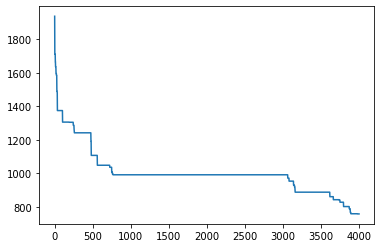

In [133]:
plt.plot(to_plot)

In [76]:
x = np.random.permutation(10)